In [3]:
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import csv
import re
from datetime import datetime

import os.path
from os import path
import time

# import sklearn
# import scipy

# from sklearn.naive_bayes import GaussianNB
# import lightgbm as lightgbm
# from xgboost import XGBClassifier
# import keras

# Get Started
# https://github.com/Refinitiv-API-Samples/Article.EikonDataAPI.DotNet.Library
# API limits
# https://developers.refinitiv.com/en/api-catalog/eikon/eikon-data-api/documentation?content=49692&type=documentation_item
import eikon as ek 

from pylab import rcParams
plt.rcParams['figure.figsize'] = 16, 8

In [4]:
fontsize_reg = 12
fontsize_title = 16
from pylab import rcParams
rcParams['figure.facecolor'] = '1'
rcParams['figure.figsize'] = [8.0, 3.5]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 600

rcParams['font.size'] = 12
rcParams['legend.fontsize'] = 'large'
rcParams['figure.titlesize'] = 'large'

In [5]:
# Зададим path для папки проекта и для папок файлов
path_project_folder = 'C:/DAN/t_systems/trade_project/'
folder_name_headlines = 'backup_headlines/'
folder_name_logger = 'logger/'

In [6]:
def get_name_of_latest_file_in_folder(folder_name):
    files_creation_dates = pd.DataFrame(data = [], columns=[
        "folder_name", "file_name", "num_time", "str_time"
    ])

    files_creation_dates['file_name'] = os.listdir(folder_name)
    files_creation_dates['folder_name'] = folder_name
    files_creation_dates['file_folder_and_name'] = files_creation_dates['folder_name'] + files_creation_dates['file_name']
    files_creation_dates
    for i in range(0, len(files_creation_dates)):
        file_folder_and_name = files_creation_dates['file_folder_and_name'][i]
        files_creation_dates['num_time'][i] = os.path.getctime(file_folder_and_name)
        files_creation_dates['str_time'][i] = time.ctime(os.path.getctime(file_folder_and_name))

    most_latest_file_dir = files_creation_dates.sort_values(by=['num_time'], ascending=False)['file_folder_and_name'].iloc[0]
    
    return most_latest_file_dir

In [7]:
most_latest_file = get_name_of_latest_file_in_folder(path_project_folder + folder_name_headlines)
all_headlines_df = pd.read_csv(most_latest_file, sep='~')
all_headlines_df['versionCreated'] = pd.to_datetime(all_headlines_df['versionCreated'])
print(all_headlines_df.shape, most_latest_file)

(112841, 6) C:/DAN/t_systems/trade_project/backup_headlines/all_headlines_df_2021-01-11_v2.csv


In [8]:
all_headlines_df

,ric,versionCreated,headline,storyId,sourceCode,story
0,DTEGn.DE,2020-12-23 18:25:27.865000+00:00,IGN Igen Networks joins T-Mobile partner program,urn:newsml:reuters.com:20201223:nNRAdspppv:1,NS:CNSWCH,"<div class=""storyContent"" lang=""en""><style typ..."
1,DTEGn.DE,2020-12-22 08:35:59.285000+00:00,(EN) Makedonski Telekom AD - Skopje Board Chan...,urn:newsml:reuters.com:20201222:nGLF4Kt1L3:2,NS:GLFILE,"<div class=""storyContent"" lang=""en""><p><a href..."
2,DTEGn.DE,2020-12-22 08:35:53.014000+00:00,(EN) Makedonski Telekom AD - Skopje Board Chan...,urn:newsml:reuters.com:20201222:nGLF2DBhZz:2,NS:GLFILE,"<div class=""storyContent"" lang=""en""><p><a href..."
3,DTEGn.DE,2020-12-21 13:08:03.993000+00:00,"WFB (Bus), Anyone? T-Mobile Turns Red Rose Tra...",urn:newsml:reuters.com:20201221:nBw3VPZ4Qa:1,NS:BSW,"<div class=""storyContent"" lang=""en""><style typ..."
4,DTEGn.DE,2020-12-19 09:00:00+00:00,HINTERGRUND-Internet überall dank Satellit und...,urn:newsml:reuters.com:20201219:nL8N2IY3D9:1,NS:RTRS,"<div class=""storyContent"" lang=""de""><style typ..."
...,...,...,...,...,...,...
112836,AAPL.OQ,2020-06-19 17:03:07+00:00,UPDATE 1-Apple to shut some U.S. stores again ...,urn:newsml:reuters.com:20200619:nL4N2DW39H:2,NS:RTRS,"<div class=""storyContent"" lang=""en""><style typ..."
112837,AAPL.OQ,2020-06-19 17:01:02+00:00,BRIEF-Apple Could Announce Plans As Soon As Mo...,urn:newsml:reuters.com:20200619:nFWN2DW05F:1,NS:RTRS,"<div class=""storyContent"" lang=""en""><style typ..."
112838,AAPL.OQ,2020-06-19 16:58:52.346000+00:00,APPLE COULD ANNOUNCE PLANS AS SOON AS MONDAY T...,urn:newsml:reuters.com:20200619:nFWN2DW05F:1,NS:RTRS,"<div class=""storyContent"" lang=""en""><style typ..."
112839,AAPL.OQ,2020-06-19 16:57:33+00:00,US GOVT-What went on so far? Apple news sinks ...,urn:newsml:reuters.com:20200619:nL1N2DW13R:1,NS:IFR,"<div class=""storyContent"" lang=""en""><style typ..."


In [9]:
# Переконвертируем сырой HTML формат в читаемый текст.
from bs4 import BeautifulSoup
all_headlines_df['story'] = all_headlines_df['story'].apply(str)
all_headlines_df['story_wo_html'] = all_headlines_df['story'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

In [10]:
all_headlines_df['story_len'] = all_headlines_df['story_wo_html'].apply(lambda x: len(x))

Average number of symbols per news text: 3132.408929378506
Story lenght quantiles:
1.00    992690.0
0.99     27460.4
0.95     10168.0
0.90      6160.0
0.75      3222.0
0.50      1422.0
0.25       537.0
0.10       167.0
0.01         0.0
0.00         0.0
Name: story_len, dtype: float64


Text(0, 0.5, 'Story lenght')

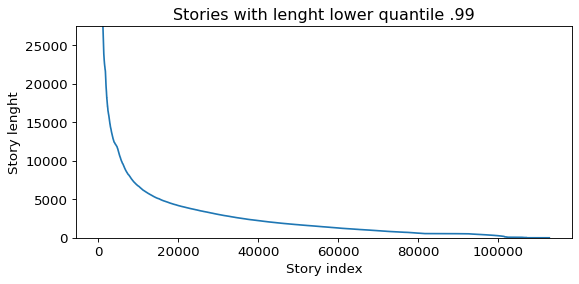

In [13]:
# Посмотрим на квантили длины текстов новостей.
quantiles_list = [1.00, 0.99, 0.95, 0.9, 0.75, 0.5, 0.25, 0.1, 0.01, 0.00]
print('Average number of symbols per news text:', all_headlines_df['story_len'].mean( ))
print('Story lenght quantiles:')
print(all_headlines_df['story_len'].quantile(quantiles_list))

# Выстроим новости по убыванию их длины
all_headlines_df['story_len'].sort_values(ascending=False).reset_index(drop=True).plot(ylim=(0, all_headlines_df['story_len'].quantile(0.99)))
plt.title('Stories with lenght lower quantile .99')
plt.xlabel('Story index')
plt.ylabel('Story lenght')

In [157]:
all_headlines_df.groupby('sourceCode').agg(
    stories_count=('storyId', 'count'),
    stories_mean_length=('story_len', 'mean')
).sort_values(by='stories_count', ascending=False).head(30)

,stories_count,stories_mean_length
sourceCode,,
NS:RTRS,52846,2309.256216
NS:RAUT,9905,527.295507
NS:PUBT,4674,9562.568250
NS:EQS,4038,5629.487370
NS:AWP,2438,23242.462674
NS:GLFILE,2383,72.496853
NS:ENPNWS,2362,4171.060542
NS:DERSPI,2079,3677.973545
NS:SUEDDE,2039,4862.332026


In [18]:
# Вытащим язык статьи и сосздадим отдельный столбец
# Только у пропущенных пустых статей нет языка

all_headlines_df['story_lang'] = np.nan

for index in all_headlines_df.index:
    story_now = all_headlines_df.loc[index, 'story']
    try:
        all_headlines_df.loc[index, 'story_lang'] = re.findall(r' lang="(.*)"', story_now)[0].split('"')[0]
    except Exception as e:
        print(index, e, story_now)

159 list index out of range nan
200 list index out of range nan
362 list index out of range nan
694 list index out of range nan
732 list index out of range nan
736 list index out of range nan
998 list index out of range nan
1038 list index out of range nan
1339 list index out of range nan
1354 list index out of range nan
1361 list index out of range nan
1577 list index out of range nan
1812 list index out of range nan
1820 list index out of range nan
1937 list index out of range nan
2528 list index out of range nan
2744 list index out of range nan
2864 list index out of range nan
3019 list index out of range nan
3443 list index out of range nan
3449 list index out of range nan
3551 list index out of range nan
3597 list index out of range nan
3716 list index out of range nan
3874 list index out of range nan
4150 list index out of range nan
4159 list index out of range nan
4202 list index out of range nan
4240 list index out of range nan
4246 list index out of range nan
4330 list index o

<AxesSubplot:ylabel='story_lang'>

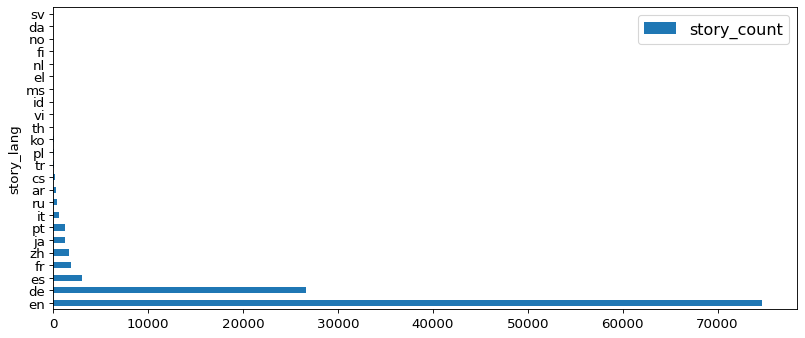

In [27]:
all_headlines_df['story_lang']
top_languages = all_headlines_df.groupby(by='story_lang').agg(
    story_count=('storyId', 'count')
).sort_values(by='story_count', ascending=False)
top_languages.plot(kind='barh', figsize=(12,5))

In [28]:
top_languages.index

Index(['en', 'de', 'es', 'fr', 'zh', 'ja', 'pt', 'it', 'ru', 'ar', 'cs', 'tr',
       'pl', 'ko', 'th', 'vi', 'id', 'ms', 'el', 'nl', 'fi', 'no', 'da', 'sv'],
      dtype='object', name='story_lang')

Text(0.5, 1.0, 'Stacked bar chart of news text languages')

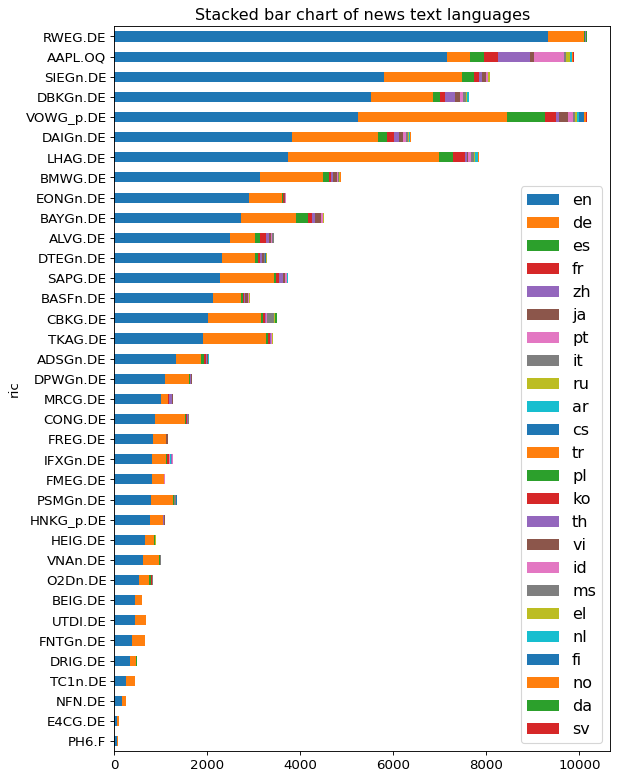

In [29]:
# Посчитаем groupby таблицу, чтобы потом построить pivot для stacked bar chart
for_pivot_groupby_ric_lang = all_headlines_df.groupby(by=['ric', 'story_lang']).agg(
    story_count=('storyId', 'count'))

# Вытащим из индекса столбцы
for_pivot_groupby_ric_lang[for_pivot_groupby_ric_lang.index.names[0]] = for_pivot_groupby_ric_lang.index.get_level_values(0)
for_pivot_groupby_ric_lang[for_pivot_groupby_ric_lang.index.names[1]] = for_pivot_groupby_ric_lang.index.get_level_values(1)

pivot_ric_lang = for_pivot_groupby_ric_lang.pivot(index='ric', columns='story_lang', values='story_count')
pivot_ric_lang = pivot_ric_lang[top_languages.index]
pivot_ric_lang = pivot_ric_lang.sort_values(by='en', ascending=True)
pivot_ric_lang.plot.barh(stacked=True, figsize=(8,12))
plt.legend(loc='lower right')
plt.title('Stacked bar chart of news text languages')

<AxesSubplot:>

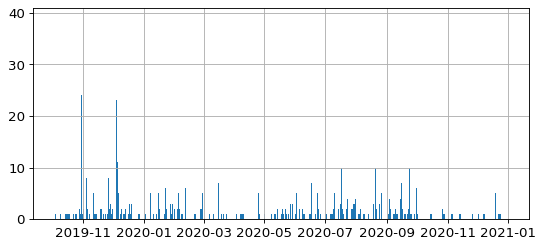

In [158]:
# Как часто публикуются новости у одной компании (почасовая разбивка 15 месяцев) # VOWG_p.DE, DTEGn.DE
all_headlines_df[(all_headlines_df['ric'] == 'VOWG_p.DE')]['versionCreated'].hist(bins=(365+90)*24)

In [231]:
all_headlines_df.head(1)

,ric,versionCreated,headline,storyId,sourceCode,story,story_lang,story_wo_html,story_len
0,DTEGn.DE,2020-12-23 18:25:27.865000+00:00,IGN Igen Networks joins T-Mobile partner program,urn:newsml:reuters.com:20201223:nNRAdspppv:1,NS:CNSWCH,"<div class=""storyContent"" lang=""en""><style typ...",en,Igen Networks Corp. has joined the T-Mobile pa...,1827


In [165]:
all_headlines_df.loc[500, 'story_wo_html']

'** Goldman Sachs adds Germany\'s Deutsche Telekom DTEGn.DE to its conviction list and reiterates its "buy" rating as it sees FCF to still treble** The broker says its management meetings have highlighted mitigating factors that should halve the FCF hit to just EUR 500 million annually, less than 10% of 2023 group FCF** It notes the above removes the "key bear risk" on the company and FCF is still to treble as capex bear risk recedes ** Despite the higher fibre spend, Deutsche Telekom still offers best-in-sector growth, the brokerage adds, saying it trades at discount multiple(( marta.frackowiak@thomsonreuters.com ))(c) Copyright Thomson Reuters 2020. Click For Restrictions - https://agency.reuters.com/en/copyright.html'

In [43]:
import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
print(word_tokenize(all_headlines_df.loc[500, 'story_wo_html']))

['*', '*', 'Goldman', 'Sachs', 'adds', 'Germany', "'s", 'Deutsche', 'Telekom', 'DTEGn.DE', 'to', 'its', 'conviction', 'list', 'and', 'reiterates', 'its', '``', 'buy', "''", 'rating', 'as', 'it', 'sees', 'FCF', 'to', 'still', 'treble', '*', '*', 'The', 'broker', 'says', 'its', 'management', 'meetings', 'have', 'highlighted', 'mitigating', 'factors', 'that', 'should', 'halve', 'the', 'FCF', 'hit', 'to', 'just', 'EUR', '500', 'million', 'annually', ',', 'less', 'than', '10', '%', 'of', '2023', 'group', 'FCF', '*', '*', 'It', 'notes', 'the', 'above', 'removes', 'the', '``', 'key', 'bear', 'risk', "''", 'on', 'the', 'company', 'and', 'FCF', 'is', 'still', 'to', 'treble', 'as', 'capex', 'bear', 'risk', 'recedes', '*', '*', 'Despite', 'the', 'higher', 'fibre', 'spend', ',', 'Deutsche', 'Telekom', 'still', 'offers', 'best-in-sector', 'growth', ',', 'the', 'brokerage', 'adds', ',', 'saying', 'it', 'trades', 'at', 'discount', 'multiple', '(', '(', 'marta.frackowiak', '@', 'thomsonreuters.com', '

In [49]:
tokenized_df = pd.DataFrame(data = [], columns=[
    "ric", "storyId", "token"
])

In [51]:
for index, row in all_headlines_df.iterrows():
    tokenized_story_slice = pd.DataFrame(data = [], columns=["ric", "storyId", "token"])
    tokenized_story_slice['token'] = word_tokenize(row['story_wo_html'])
    tokenized_story_slice['ric'] = row['ric']
    tokenized_story_slice['storyId'] = row['storyId']
    tokenized_df = tokenized_df.append(tokenized_story_slice, ignore_index = True)
    if index % 500 == 0:
        print(index, end=' ')

0 500 1000 1500 2000 2500 3000 3500 4000 4500 5000 5500 6000 6500 7000 

KeyboardInterrupt: 

In [52]:
tokenized_df.groupby(['token', 'storyId']).agg(
    count_token = 
)

,ric,storyId,token
0,DTEGn.DE,urn:newsml:reuters.com:20201223:nNRAdspppv:1,Igen
1,DTEGn.DE,urn:newsml:reuters.com:20201223:nNRAdspppv:1,Networks
2,DTEGn.DE,urn:newsml:reuters.com:20201223:nNRAdspppv:1,Corp.
3,DTEGn.DE,urn:newsml:reuters.com:20201223:nNRAdspppv:1,has
4,DTEGn.DE,urn:newsml:reuters.com:20201223:nNRAdspppv:1,joined
...,...,...,...
4047285,SAPG.DE,urn:newsml:reuters.com:20201028:nBw4pSj2Wa:1,Business
4047286,SAPG.DE,urn:newsml:reuters.com:20201028:nBw4pSj2Wa:1,Wire
4047287,SAPG.DE,urn:newsml:reuters.com:20201028:nBw4pSj2Wa:1,2020Keywords
4047288,SAPG.DE,urn:newsml:reuters.com:20201028:nBw4pSj2Wa:1,:


In [66]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from pandas import DataFrame

In [129]:
texts_list = all_headlines_df[(all_headlines_df['ric'] == 'DTEGn.DE') & (all_headlines_df['story_lang'] == 'en')]['story_wo_html']
count_vect = CountVectorizer()
tfidf_vect = TfidfVectorizer()

In [71]:
def create_document_term_matrix(message_list, vectorizer):
    doc_term_matrix = vectorizer.fit_transform(message_list)
    return DataFrame(doc_term_matrix.toarray(), 
                     columns=vectorizer.get_feature_names())

In [141]:
texts_matrix = create_document_term_matrix(texts_list, tfidf_vect)
texts_matrix_transposed = texts_matrix.transpose()

In [160]:
texts_matrix

,00,000,0000,00000000,0000the,0001,000aggregate,000ft²,000m2,000mah,...,šodolovci,štrigova,željko,žilina,žminj,žunić,župa,οτε,тhe,ﬁnancial
0,0.0,0.056471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2318,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2319,0.0,0.013428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2320,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
texts_matrix_transposed['max_token'] = texts_matrix_transposed.idxmax(axis=1)

In [145]:
texts_matrix.max().sort_values(ascending=False)

amdocs           0.806965
denars           0.796914
vlocity          0.782096
eschat           0.777534
gci              0.773703
                   ...   
wallgau          0.001064
brightened       0.001064
hub4industry     0.001064
lampertswalde    0.001064
concierge        0.001064
Length: 28003, dtype: float64

In [156]:
texts_matrix_transposed['max_token'].sort_values(ascending=False).head()

xboxpress         2319
xcloud            2319
game              2319
20190924006100    2319
163               2315
Name: max_token, dtype: int64